In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
import pandas as pd
df = pd.read_csv('quikr_car.csv')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['kms_driven'] = df['kms_driven'].str.replace(',', '')
df['kms_driven'] = df['kms_driven'].str.extract('(\d+)').astype(float)
df = df.dropna(subset=['Price', 'kms_driven'])
X = df['Price']
y = df['kms_driven']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

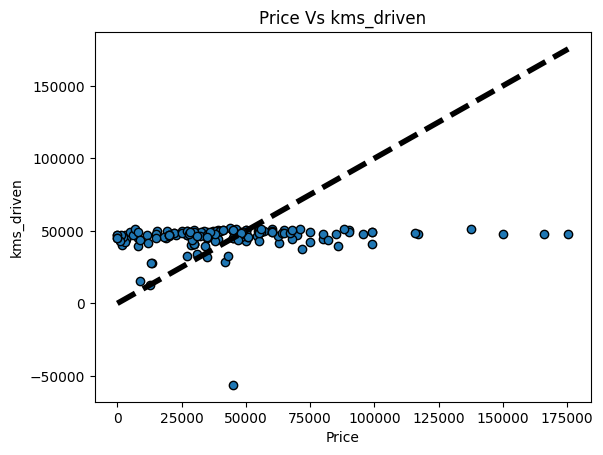

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Price')
plt.ylabel('kms_driven')
plt.title('Price Vs kms_driven')
plt.show()
